<a href="https://colab.research.google.com/github/MiguelFigueroa02/alura_Machine_Learning/blob/main/Ejercicios_clasif_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
url = 'https://raw.githubusercontent.com/MiguelFigueroa02/alura_Machine_Learning/refs/heads/main/churn.csv'
datos = pd.read_csv(url)
datos.head()

,id_cliente,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,15634602,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0


1 - La primera etapa en un proyecto de Machine Learning es la obtención de datos. A partir de esta obtención, podemos leer los datos para construir un modelo. Como tarea inicial, realiza la lectura de la base de datos y verifica la presencia de datos nulos. Además, elimina la columna 'id_cliente', ya que este tipo de información única para cada fila no es útil para su uso en modelos de machine learning.

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             10000 non-null  int64  
 1   score_credito          10000 non-null  int64  
 2   pais                   10000 non-null  object 
 3   sexo_biologico         10000 non-null  object 
 4   edad                   10000 non-null  int64  
 5   años_de_cliente        10000 non-null  int64  
 6   saldo                  10000 non-null  float64
 7   servicios_adquiridos   10000 non-null  int64  
 8   tiene_tarjeta_credito  10000 non-null  int64  
 9   miembro_activo         10000 non-null  int64  
 10  salario_estimado       10000 non-null  float64
 11  churn                  10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


No se observan datos nulos


In [4]:
datos = datos.drop(columns='id_cliente')

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   sexo_biologico         10000 non-null  object 
 3   edad                   10000 non-null  int64  
 4   años_de_cliente        10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   servicios_adquiridos   10000 non-null  int64  
 7   tiene_tarjeta_credito  10000 non-null  int64  
 8   miembro_activo         10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churn                  10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


2 - Después de leer los datos, es importante conocer los datos, revisando inconsistencias y entendiendo el comportamiento de cada una de las columnas. En esta tarea, realiza un análisis exploratorio utilizando gráficos para las variables categóricas de la base de datos, incluyendo la variable objetivo churn. Para estas variables, se pueden utilizar gráficos de barras para contar las categorías y hacer un agrupamiento por colores de acuerdo con las categorías de la variable objetivo.

In [6]:
import plotly.express as px

In [7]:
datos.columns

Index(['score_credito', 'pais', 'sexo_biologico', 'edad', 'años_de_cliente',
       'saldo', 'servicios_adquiridos', 'tiene_tarjeta_credito',
       'miembro_activo', 'salario_estimado', 'churn'],
      dtype='object')

Variables categóricas

```Phyton
['pais', 'sexo_biologico', 'servicios_adquiridos', 'tiene_tarjeta_credito',
       'miembro_activo', 'churn']
```



In [8]:
categoricas = ['pais', 'sexo_biologico', 'servicios_adquiridos', 'tiene_tarjeta_credito',
       'miembro_activo']

In [9]:
for columna in categoricas:
  print(f'Análisis de variable categórica {columna}')
  fig = px.histogram(datos, x=columna,color='churn', barmode='group',text_auto=True)
  fig.update_layout(title=dict(
        text=f'<b>Análisis descriptivo de la columna {columna}</b>',
        x=0.2,
        xanchor='left'
    ),width=800, height=700)
  fig.show()
  print('*'*100)

Análisis de variable categórica pais


****************************************************************************************************
Análisis de variable categórica sexo_biologico


****************************************************************************************************
Análisis de variable categórica servicios_adquiridos


****************************************************************************************************
Análisis de variable categórica tiene_tarjeta_credito


****************************************************************************************************
Análisis de variable categórica miembro_activo


****************************************************************************************************


3 - Después de explorar las variables categóricas, es el turno de las variables numéricas. Construye gráficos de distribución como boxplots o histogramas para analizar el comportamiento de los valores numéricos y verificar si hay valores inconsistentes.

Variables numéricas


```Phyton
['score_credito', 'edad', 'años_de_cliente',
       'saldo', 'servicios_adquiridos', 'salario_estimado']
```



In [10]:
numerica = ['score_credito', 'edad', 'años_de_cliente',
       'saldo', 'servicios_adquiridos', 'salario_estimado']

In [11]:
for columna in numerica:
  fig = px.box(datos, x=columna, color='churn')
  fig.update_layout(title=dict(
      text=f'<b>Análisis de valores numéricos de variable {columna}</b>'
  ))
  fig.show()
  print('*'*200)

********************************************************************************************************************************************************************************************************


********************************************************************************************************************************************************************************************************


********************************************************************************************************************************************************************************************************


********************************************************************************************************************************************************************************************************


********************************************************************************************************************************************************************************************************


********************************************************************************************************************************************************************************************************


Para utilizar los datos en los algoritmos de Machine Learning, necesitamos informar cuáles son las variables explicativas y cuál es la variable objetivo. En este desafío, realiza la separación de la base de datos de churn entre las variables explicativas, almacenando en una variable x y la variable objetivo en y.

In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   sexo_biologico         10000 non-null  object 
 3   edad                   10000 non-null  int64  
 4   años_de_cliente        10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   servicios_adquiridos   10000 non-null  int64  
 7   tiene_tarjeta_credito  10000 non-null  int64  
 8   miembro_activo         10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churn                  10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
X = datos.drop('churn', axis=1)

In [14]:
y= datos['churn']

Las variables categóricas que están en formato de texto no pueden ser utilizadas directamente en los modelos de Machine Learning. En este desafío, realiza la transformación de las variables categóricas al formato numérico utilizando el OneHotEncoder, utilizando el parámetro drop='if_binary' si alguna variable tiene solo 2 categorías.

In [15]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [16]:
columnas = X.columns
columnas

Index(['score_credito', 'pais', 'sexo_biologico', 'edad', 'años_de_cliente',
       'saldo', 'servicios_adquiridos', 'tiene_tarjeta_credito',
       'miembro_activo', 'salario_estimado'],
      dtype='object')

In [17]:
X.head()

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10


In [71]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['pais', 'sexo_biologico','tiene_tarjeta_credito', 'miembro_activo']),remainder='passthrough',
                                  sparse_threshold=0,force_int_remainder_cols=False)

In [19]:
X = one_hot.fit_transform(X)

In [20]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

In [21]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__pais_Alemania,onehotencoder__pais_España,onehotencoder__pais_Francia,onehotencoder__sexo_biologico_Mujer,onehotencoder__tiene_tarjeta_credito_1,onehotencoder__miembro_activo_1,remainder__score_credito,remainder__edad,remainder__años_de_cliente,remainder__saldo,remainder__servicios_adquiridos,remainder__salario_estimado
0,0.0,0.0,1.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,0.0,1.0,0.0,1.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,0.0,0.0,1.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,0.0,0.0,1.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,0.0,1.0,0.0,1.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,1.0,0.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,0.0,0.0,1.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,1.0,0.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


La variable objetivo, como es de tipo categórica, también necesita pasar por un tratamiento similar al de las variables explicativas categóricas para que pueda ser utilizada en los algoritmos. En esta tarea, utiliza el método LabelEncoder para realizar la transformación de la variable churn.


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder= LabelEncoder()

In [24]:
y = label_encoder.fit_transform(y)

In [25]:
y

array([1, 0, 1, ..., 1, 1, 0])

La separación de los datos entre conjunto de entrenamiento y prueba es esencial para comprender si un modelo está logrando aprender los patrones y generalizar a nuevos datos. En esta tarea, realiza la división de la base de datos entre entrenamiento y prueba de forma estratificada.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.25, stratify=y,random_state=5)

Un modelo base es muy importante para definir un criterio de comparación para modelos más complejos. En esta etapa, crea un modelo base con el DummyClassifier y encuentra la tasa de acierto con el método score.

In [28]:
from sklearn.dummy import DummyClassifier

In [29]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7962666666666667

El árbol de decisión es un algoritmo que realiza las clasificaciones a partir de decisiones simples tomadas a partir de los datos. Debemos tener cierto cuidado de no utilizar una profundidad muy grande, porque esto puede provocar un sobreajuste del modelo a los datos de entrenamiento. En este desafío, crea un modelo de árbol de decisión con el parámetro max_depth=4, evalúa el desempeño del modelo en los datos de prueba y visualiza las decisiones del árbol usando el método plot_tree.

In [30]:
 from sklearn.tree import DecisionTreeClassifier

In [31]:
modelo_arbol= DecisionTreeClassifier(max_depth = 4,random_state=5)

In [32]:
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [33]:
modelo_arbol.score(X_test, y_test)

0.8436

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

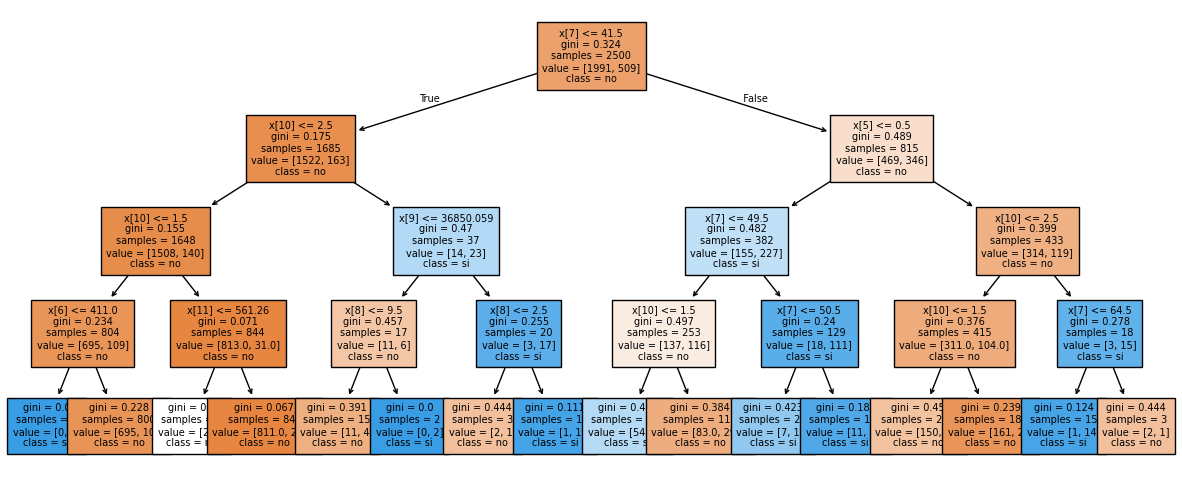

In [36]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol, filled=True, class_names=['no','si'],fontsize=7);

La normalización de datos es una tarea importante para mantener todos los valores numéricos en una misma escala y garantizar que todas las características tengan el mismo impacto en el modelo. En esta tarea, realiza la normalización de la base de datos usando el MinMaxScaler.

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [39]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,1.0,0.656,0.107692,1.0,0.322870,0.333333,0.657368
1,0.0,1.0,0.0,0.0,0.0,1.0,0.480,0.246154,0.0,0.276073,0.333333,0.801666
2,1.0,0.0,0.0,0.0,1.0,0.0,0.400,0.476923,0.0,0.456429,0.666667,0.306913
3,0.0,0.0,1.0,0.0,1.0,0.0,0.612,0.384615,0.7,0.565969,0.000000,0.973484
4,0.0,0.0,1.0,0.0,1.0,1.0,0.638,0.492308,0.4,0.628026,0.666667,0.624205
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.0,1.0,0.0,0.0,1.0,0.304,0.230769,0.7,0.000000,0.333333,0.019942
2496,0.0,0.0,1.0,0.0,1.0,1.0,0.274,0.292308,0.6,0.000000,0.333333,0.632234
2497,1.0,0.0,0.0,0.0,1.0,0.0,0.716,0.046154,0.8,0.562002,0.333333,0.251119
2498,1.0,0.0,0.0,0.0,0.0,0.0,0.748,0.246154,0.6,0.495981,0.333333,0.785612


Con los datos normalizados, podemos utilizar el modelo KNN, que hace cálculos de distancia para encontrar los vecinos más cercanos. En esta actividad, crea un modelo KNN usando el KNeighborsClassifier con los datos normalizados y evalúa el rendimiento en los datos de prueba, también normalizados.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
kn = KNeighborsClassifier()

In [42]:
kn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [44]:
X_test_normalizado = normalizacion.transform(X_test)

In [45]:
kn.score(X_test_normalizado, y_test)

0.8077333333333333

Después de construir los modelos, es el momento de comparar los resultados y seleccionar aquel que tiene el mejor rendimiento. En este desafío, evalúa la tasa de acierto de los modelos DummyClassifier, DecisionTreeClassifier y KNeighborsClassifier que fueron construidos en los otros desafíos utilizando el método score y, a continuación, almacena el modelo con mejor precisión en un archivo pickle. Los modelos de transformación también necesitan ser almacenados, que es el caso del OneHotEncoder y del MinMaxScaler, en caso de que el KNN tenga el mejor rendimiento.

In [46]:
lista = [('dummy', dummy,X_test), ('de_arbol', modelo_arbol, X_test),('knn', kn, X_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo {i[0]}: {i[1].score(i[2], y_test)}')

La exactitud del modelo dummy: 0.7962666666666667
La exactitud del modelo de_arbol: 0.8436
La exactitud del modelo knn: 0.8077333333333333


In [47]:
import pickle

In [48]:
with open('modelo_onehotencoder.pkl', 'wb') as archivo:
  pickle.dump(one_hot, archivo)

In [49]:
with open('modelo_champion.pkl', 'wb') as archivo:
  pickle.dump(modelo_arbol, archivo)

Después de que el modelo está en producción, ya puede ser utilizado para clasificar nuevos datos. En este desafío, realiza la lectura de los archivos pickle de los modelos que fueron guardados en el desafío anterior y utiliza los modelos para hacer la predicción del siguiente registro:

In [80]:
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1],
    'salario_estimado': [85270.00]
})

In [81]:

nuevo_dato

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado
0,850,Francia,Hombre,27,3,56000,1,1,1,85270.0


In [82]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotencoder.pkl')

In [83]:
modelo_arbol=pd.read_pickle('/content/modelo_champion.pkl')

In [84]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)

In [85]:
modelo_arbol.predict(nuevo_dato)

array([0])

In [ ]:
#con un 84% de precisión podemos decir que el cliente no ha hecho churn
